In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print( cancer.keys() )
print( cancer.target_names )
# print( cancer.target[:5])
# print( cancer.data[:5])
print( cancer.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['malignant' 'benign']
(569, 30)


In [7]:
np.bincount(cancer['target'])

array([212, 357], dtype=int64)

In [8]:
import numpy as np

# 양성과 악성 데이터의 수
# zip() : 2개의 데이터를 연결
# bincount() : 클래스별 개수를 반환
for n, v in zip(cancer.target_names, np.bincount(cancer.target)):
  print({n:v})

{'malignant': 212}
{'benign': 357}


In [9]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    random_state=66)
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [11]:
np.bincount(cancer.target) # 0은 악성, 1은 양성

array([212, 357], dtype=int64)

In [12]:
# 비슷한 비율로 나눠졌나 확인
t1 = np.bincount(y_train)
print(t1[1]/t1[0])
t2 = np.bincount(y_test)
print(t2[1]/t2[0])
t3 = np.bincount(cancer.target)
print(t3[1]/t3[0])

1.679245283018868
1.6981132075471699
1.6839622641509433


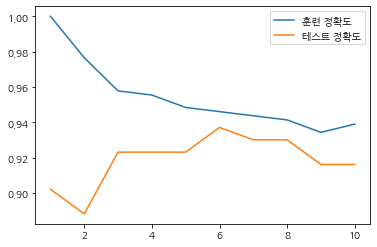

In [13]:
train_acc = []
test_acc = []

n_neighbors = range(1, 11)

for n in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
    
plt.plot(n_neighbors, train_acc, label='훈련 정확도')
plt.plot(n_neighbors, test_acc, label='테스트 정확도')
plt.legend()
plt.show()

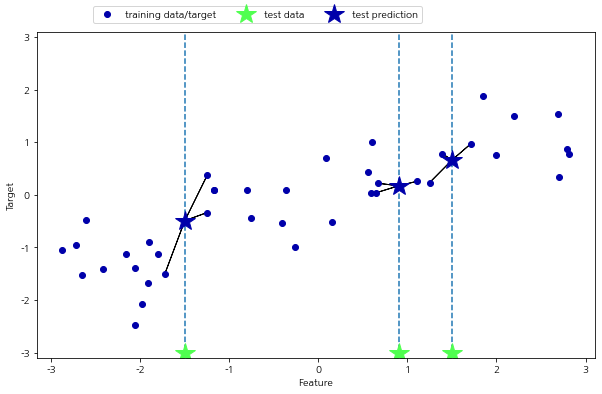

In [14]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_knn_regression(n_neighbors=3)

In [15]:
# KNN 회귀는 수치로 나옴
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=9) #데이터 9개

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

pre = model.predict(X_test)
pre

array([-0.04382817, -0.04382817, -0.04382817])

In [16]:
from sklearn.neighbors import KNeighborsRegressor

# 영화에 대한 3개의 특성
X_train = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
# 영화에 대한 별점 
y_train = [5.0, 6.8, 9.0]

# 새로운 영화 3건에 대해 별점을 예측
X_test = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

 #거리에 따른 가중평균을 적용
model = KNeighborsRegressor(n_neighbors=3, weights='distance')
model.fit(X_train, y_train)

pre = model.predict(X_test)
pre


array([7.28143288, 7.76451922, 6.8457845 ])

In [17]:
#####################################################################

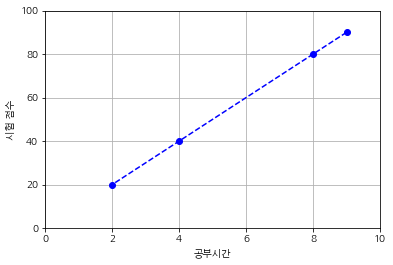

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [9, 8, 4, 2]
y = [90, 80, 40, 20]
plt.plot(x, y, 'b--o')
plt.xlabel('공부시간')
plt.ylabel('시험 점수')
plt.grid()
plt.xlim(0,10)
plt.ylim(0,100)
plt.show()

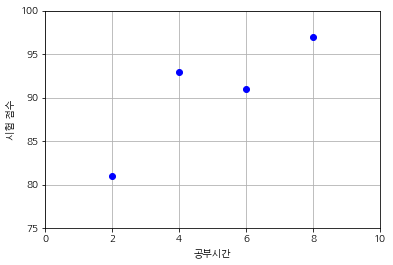

In [19]:
x = [8, 6, 4, 2]
y = [97, 91, 93, 81]
plt.plot(x, y, 'bo')
plt.xlabel('공부시간')
plt.ylabel('시험 점수')
plt.grid()
plt.xlim(0,10)
plt.ylim(75,100)
plt.show()
# 그럴사한 선을 그린다음 각 점들의 오차값 구해봄

In [20]:
##### 최소 제곱법 ######
a = ( (2-5)*(81-90.5)+(4-5)*(93-90.5)+(6-5)*(91-90.5)+(8-5)*(97-90.5) )  /  ( (2-5)**2 + (4-5)**2 + (6-5)**2 + (8-5)**2 )
a1 = ( (2-5)*(81-90.5)+(4-5)*(93-90.5)+(6-5)*(91-90.5)+(8-5)*(97-90.5) ) 
a2 = ( (2-5)**2 + (4-5)**2 + (6-5)**2 + (8-5)**2 )
a1, a2, a

(46.0, 20, 2.3)

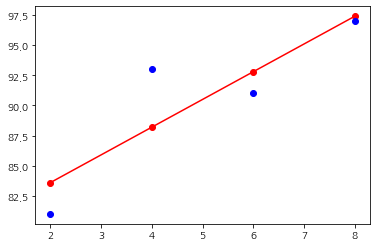

In [21]:
# 오차가 최저가 되는 직선
import numpy as np
# 기울기 a를 최소제곱법으로 구하는 함수
def compute_a(x, y, mean_x, mean_y):
    #분자부분
    dc = 0
    for i in range(len(x)):
        dc += (x[i]-mean_x) * (y[i]-mean_y)
        
    #분모부분
    divisor = 0
    for i in x:
        divisor +=(i -mean_x)**2
        
    a = dc/divisor    
    return a

x = [8, 6, 4, 2]
y = [97, 91, 93, 81]
mx = np.mean(x)
my = np.mean(y)
a = compute_a(x, y, mx, my) # 기울기
b = my - (mx * a)

y_pred = [a* x1 + b for x1 in x]

plt.plot(x, y_pred, 'r-o')
plt.plot(x, y, 'bo')

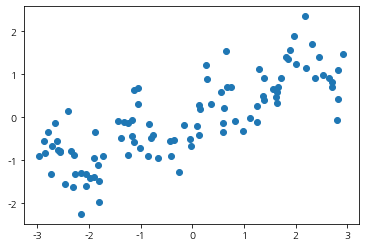

In [22]:
import numpy as np
import mglearn

X, y = mglearn.datasets.make_wave(100)
plt.scatter(X, y)
plt.show()

w[0]: 0.393906  b: -0.031804


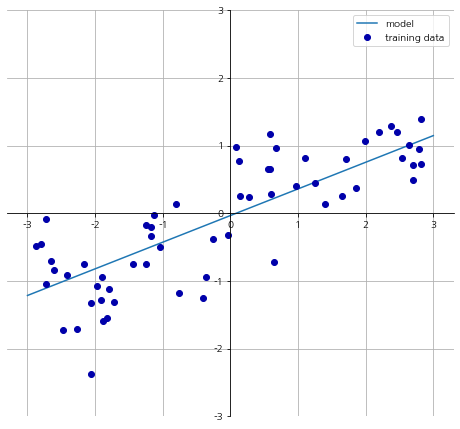

In [23]:
mglearn.plots.plot_linear_regression_wave()

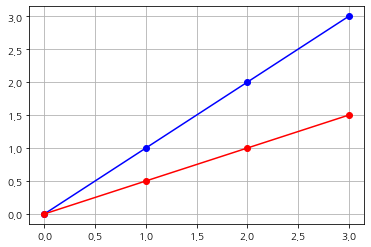

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 2, 3])

# 가중치(계수) 및 편향(절편)
w = 1
b = 0
y_pred1 = w * x+ b
plt.plot(x, y_pred1,'b-o')

w = 0.5
b = 0
y_pred2 = w * x+ b
plt.plot(x, y_pred2,'r-o')

plt.grid()
plt.show()


In [25]:
# y_pred(예측값), y(실제값)
def MSE(y_pred, y):
    cost = np.sum((y_pred - y)**2)/ len(y)
    return cost

print(MSE(y_pred1, y))
print(MSE(y_pred2, y))

0.0
0.875


 0 w1=0.941278, b=0.434934, cost=2.666578, (y_pred-y).mean()=-0.074398
 1 w1=1.015676, b=0.618181, cost=2.421816, (y_pred-y).mean()=-0.073360
 2 w1=1.089036, b=0.783393, cost=2.199970, (y_pred-y).mean()=-0.072399
 3 w1=1.161435, b=0.931905, cost=2.006850, (y_pred-y).mean()=-0.071509
 4 w1=1.232944, b=1.064953, cost=1.840074, (y_pred-y).mean()=-0.070685
 5 w1=1.303629, b=1.183682, cost=1.699177, (y_pred-y).mean()=-0.069922
 6 w1=1.373551, b=1.289152, cost=1.580153, (y_pred-y).mean()=-0.069216
 7 w1=1.442767, b=1.382345, cost=1.479816, (y_pred-y).mean()=-0.068562
 8 w1=1.511329, b=1.464169, cost=1.396290, (y_pred-y).mean()=-0.067956
 9 w1=1.579285, b=1.535466, cost=1.326510, (y_pred-y).mean()=-0.067395
10 w1=1.646679, b=1.597015, cost=1.269344, (y_pred-y).mean()=-0.066875
11 w1=1.713555, b=1.649538, cost=1.220589, (y_pred-y).mean()=-0.066395
12 w1=1.779949, b=1.693704, cost=1.179699, (y_pred-y).mean()=-0.065949
13 w1=1.845899, b=1.730130, cost=1.146601, (y_pred-y).mean()=-0.065537
14 w1=

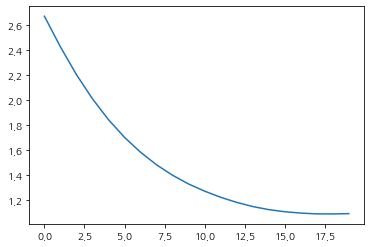

In [31]:
import numpy as np
import matplotlib.pyplot as plt
w_val = []
cost_val = []
xx_val = []

n_sample = 200
x1 = np.random.randn(n_sample)

y = 2 * x1 + 4 + np.random.randn(n_sample)

num_epoch = 20
lr = 0.07


w1 = np.random.uniform()
b =  np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w1 + x1 + b
    cost = np.abs(y_pred - y).mean()
    xx = lr * ((y_pred - y)*x1).mean()
    print(f'{epoch:2} w1={w1:.6f}, b={b:.6f}, cost={cost:.6f}, (y_pred-y).mean()={xx:.6f}')
    
    w1 = w1 - xx
    b = b - lr *(y_pred -y).mean()
    
    w_val.append(w)
    cost_val.append(cost)
    xx_val.append(xx)
    
plt.plot(range(num_epoch), cost_val)
plt.show()

In [32]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
# 배달거리와 배달시간 데이터
data = np.array([
    [100, 20], 
    [150, 24], 
    [300, 36], 
    [400, 47], 
    [130, 22], 
    [240, 32],
    [350, 47], 
    [200, 42], 
    [100, 21], 
    [110, 21], 
    [190, 30], 
    [120, 25], 
    [130, 18], 
    [270, 38], 
    [255, 28]])

x = data[:, 0]
y = data[:, 1]

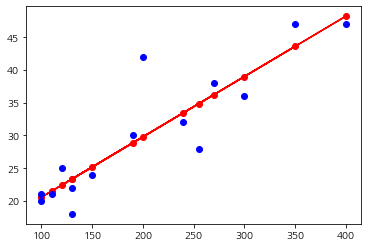

In [39]:
def compute_a(x, y, mean_x, mean_y):
    dc = 0 
    for i in range(len(x)):
        dc +=(x[i] - mean_x)*(y[i] - mean_y)
    
    divisor = 0
    for i in range(len(x)):
        divisor += (x[i] - mean_x)**2
        
    a = dc/divisor
    return a

mean_x = np.mean(x)
mean_y = np.mean(y)

a = compute_a(x, y, mean_x, mean_y)
b = mean_y - (mean_x * a)
y_pred = [a*x1 + b for x1 in x]

plt.plot(x, y_pred, 'r-o')
plt.plot(x, y, 'bo')
plt.show()

In [41]:
y_pred = [a*350 +b]

In [42]:
y_pred

[43.63440484509667]

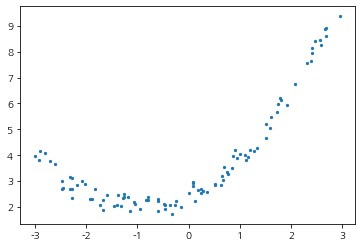

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
x = 6 * np.random.rand(n, 1) -3
y = 0.5 * x**2 + 1*x +2 + np.random.rand(n,1)

plt.scatter(x, y, s=5)

In [50]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x_poly.shape, x.shape

((100, 2), (100, 1))

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_poly, y)
model.coef_, model.intercept_

(array([[0.96963104, 0.51694819]]), array([2.438172]))

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(60)
#plt.scatter(X, y)
X_train,X_test, y_train,y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("가중치(계수, 기울기):", model.coef_)
print("편향(절편, b):", model.intercept_)

print("훈련 점수:", model.score(X_train,y_train))
print("테스트 점수:", model.score(X_test, y_test))


가중치(계수, 기울기): [0.39390555]
편향(절편, b): -0.031804343026759746
훈련 점수: 0.6700890315075756
테스트 점수: 0.65933685968637


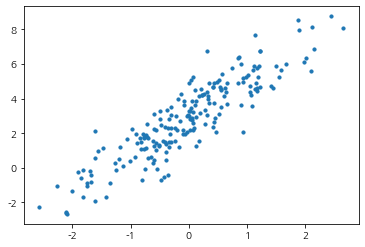

In [61]:
n_sample = 200

x = np.random.randn(n_sample)
w = 2
b = 3
y = w * x + b + np.random.randn(n_sample)
plt.scatter(x, y, s = 10)


    


In [72]:
n_samples = 200
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)
y = 2 * x1 + 3 * x2 + 4 + np.random.randn(n_samples)

import pandas as pd
dic = {'x1':x1, 'x2':x2}
X=pd.DataFrame(dic)

model = LinearRegression()
model.fit(X,y)
model.coef_, model.intercept_

(array([1.96552801, 2.91324397]), 4.054190288441485)

1